# **Training the model**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Read the CSV file
dfunrefined = pd.read_csv('nomis1.csv')

In [ ]:
# we will start diving the data to three equal parts. a) Training dataset b) Treatment dataset c) Control dataset

# Split the DataFrame into three equal parts
df_parts = np.array_split(dfunrefined, 3)

# Extract the individual parts
part1, part2, part3 = df_parts[0], df_parts[1], df_parts[2]

# Print the sizes of each part
print("Part 1 size:", len(part1))
print("Part 2 size:", len(part2))
print("Part 3 size:", len(part3))



Part 1 size: 69363
Part 2 size: 69363
Part 3 size: 69362


In [ ]:
df=part1
df

,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Accept?,Rate,Cost of Funds,Partner Bin
0,3.0,695.0,7/1/2002,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0
1,1.0,751.0,7/1/2002,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0
2,1.0,731.0,7/1/2002,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0
3,4.0,652.0,7/1/2002,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0
4,1.0,730.0,7/1/2002,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69358,2.0,710.0,6/18/2003,60.0,21000.0,5.5,R,4.75,0.0,5.00,1.1038,1.0
69359,3.0,696.0,6/18/2003,48.0,35000.0,,N,4.09,0.0,5.15,1.1038,3.0
69360,4.0,661.0,6/20/2003,48.0,31000.0,,N,4.09,0.0,7.89,1.0438,3.0
69361,2.0,724.0,6/18/2003,60.0,30000.0,,N,4.09,0.0,4.35,1.1038,1.0


In [ ]:
df.dropna(inplace=True)
df

,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Accept?,Rate,Cost of Funds,Partner Bin
0,3.0,695.0,7/1/2002,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0
1,1.0,751.0,7/1/2002,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0
2,1.0,731.0,7/1/2002,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0
3,4.0,652.0,7/1/2002,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0
4,1.0,730.0,7/1/2002,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69358,2.0,710.0,6/18/2003,60.0,21000.0,5.5,R,4.75,0.0,5.00,1.1038,1.0
69359,3.0,696.0,6/18/2003,48.0,35000.0,,N,4.09,0.0,5.15,1.1038,3.0
69360,4.0,661.0,6/20/2003,48.0,31000.0,,N,4.09,0.0,7.89,1.0438,3.0
69361,2.0,724.0,6/18/2003,60.0,30000.0,,N,4.09,0.0,4.35,1.1038,1.0


In [ ]:
is_empty = df.empty

if is_empty:
    print("DataFrame is empty.")
else:
    print("DataFrame is not empty.")

DataFrame is not empty.


In [ ]:
print(df.dtypes)
df.columns

Tier                float64
FICO                float64
Approve Date         object
Term                float64
Amount              float64
Previous Rate        object
Car  Type            object
Competition rate    float64
Accept?             float64
Rate                float64
Cost of Funds       float64
Partner Bin         float64
dtype: object


Index(['Tier', 'FICO', 'Approve Date', 'Term', 'Amount', 'Previous Rate',
       'Car  Type', 'Competition rate', 'Accept?', 'Rate', 'Cost of Funds',
       'Partner Bin'],
      dtype='object')

In [ ]:
df['Previous Rate'] = pd.to_numeric(df['Previous Rate'], errors='coerce')
df['Previous Rate'] = df['Previous Rate'].fillna(0)
#df['Car  Type'] = pd.to_numeric(df['Car  Type'], errors='coerce')
df['Car  Type'] = df['Car  Type'].replace(0, 'Unknown')

date of approval or seasonality will be our IV variable. Decision is our dependent variable while interest rate is our independent variable.

In [ ]:
# converting the dates to seasons 1= Summer 2= Fall 3=Winter 4=Spring
import pandas as pd

# Convert the 'Date' column to datetime format
df['Approve Date'] = pd.to_datetime(df['Approve Date'])

# Define a function to map each month to its corresponding season
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:   # Spring: March, April, May
        return 4
    elif month in [6, 7, 8]: # Summer: June, July, August
        return 1
    elif month in [9, 10, 11]: # Fall: September, October, November
        return 2
    else:                    # Winter: December, January, February
        return 3

# Set_season function to each date in the 'Date' column
df['Season'] = df['Approve Date'].apply(get_season)

df['Year'] = df['Approve Date'].dt.year
df['Season_Year'] = df['Year'].astype(str) + '_' + df['Season'].astype(str)

# Drop the 'Year'
df.drop('Year', axis=1, inplace=True)


print(df)

       Tier   FICO Approve Date  Term   Amount  Previous Rate Car  Type  \
0       3.0  695.0   2002-07-01  72.0  35000.0            0.0         N   
1       1.0  751.0   2002-07-01  60.0  40000.0            0.0         N   
2       1.0  731.0   2002-07-01  60.0  18064.0            0.0         N   
3       4.0  652.0   2002-07-01  72.0  15415.0            0.0         N   
4       1.0  730.0   2002-07-01  48.0  32000.0            0.0         N   
...     ...    ...          ...   ...      ...            ...       ...   
69358   2.0  710.0   2003-06-18  60.0  21000.0            5.5         R   
69359   3.0  696.0   2003-06-18  48.0  35000.0            0.0         N   
69360   4.0  661.0   2003-06-20  48.0  31000.0            0.0         N   
69361   2.0  724.0   2003-06-18  60.0  30000.0            0.0         N   
69362   1.0  766.0   2003-06-18  72.0  28000.0            0.0         N   

       Competition rate  Accept?  Rate  Cost of Funds  Partner Bin  Season  \
0                  6.

In [ ]:
# take log of the proce to normilize the interest rate
import numpy as np


df['Log_Rate_plus_2'] = np.log(df['Rate'] + 2)
df.columns

Index(['Tier', 'FICO', 'Approve Date', 'Term', 'Amount', 'Previous Rate',
       'Car  Type', 'Competition rate', 'Accept?', 'Rate', 'Cost of Funds',
       'Partner Bin', 'Season', 'Season_Year', 'Log_Rate_plus_2'],
      dtype='object')

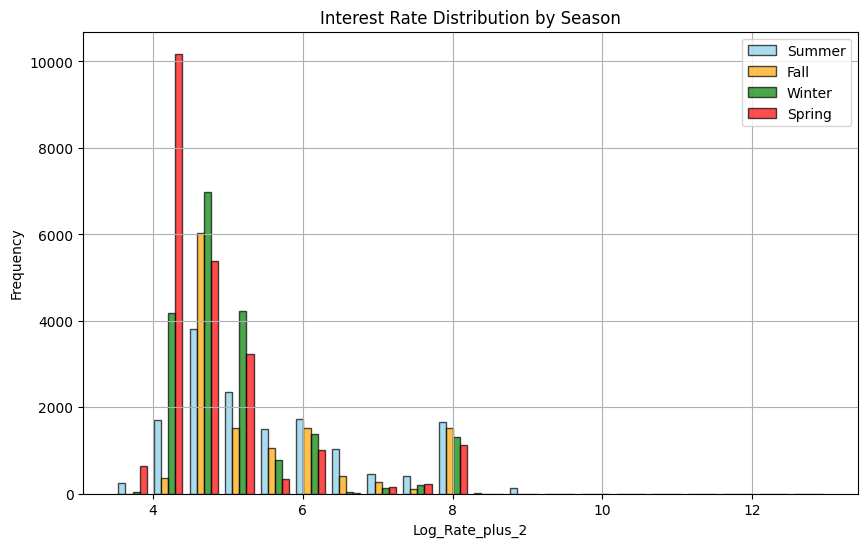

In [ ]:
import matplotlib.pyplot as plt

# Group the data by season
seasonal_data = [df[df['Season'] == season]['Rate'] for season in range(1, 5)]

# Plot the histogram of interest rate for each season
plt.figure(figsize=(10, 6))
plt.hist(seasonal_data, bins=20, color=['skyblue', 'orange', 'green', 'red'], edgecolor='black', alpha=0.7, label=['Summer', 'Fall', 'Winter', 'Spring'])
plt.xlabel('Log_Rate_plus_2')
plt.ylabel('Frequency')
plt.title('Interest Rate Distribution by Season')
plt.legend()
plt.grid(True)
plt.show()

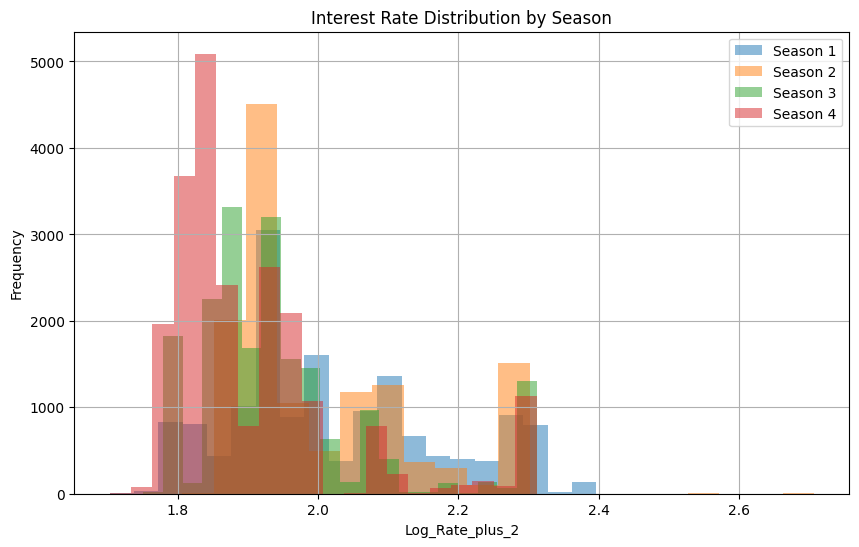

In [ ]:
import matplotlib.pyplot as plt

# Group the data by season
seasonal_data = [df[df['Season'] == season]['Log_Rate_plus_2'] for season in range(1, 5)]

# Plot separate histograms for each season with different colors
plt.figure(figsize=(10, 6))
for i, season_data in enumerate(seasonal_data, 1):
    plt.hist(season_data, bins=20, alpha=0.5, label=f'Season {i}')

plt.xlabel('Log_Rate_plus_2')
plt.ylabel('Frequency')
plt.title('Interest Rate Distribution by Season')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Rename columns to make them one word
df.rename(columns={
    'Previous Rate': 'PreviousRate',
    'Car  Type': 'CarType',
    'Competition rate': 'CompetitionRate',
    'Cost of Funds': 'CostOfFunds',
    'Partner Bin': 'PartnerBin',
    'Accept?': 'Accept'
}, inplace=True)

In [ ]:
#Running IV2SLS on instrumental variable
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
!pip install linearmodels #!pip install NAME_OF_PACKAGE
from linearmodels.iv import IV2SLS
from sklearn.model_selection import train_test_split


# Define the independent variables (X) and the dependent variable (y)
X = df[['CarType', 'PreviousRate', 'CostOfFunds', 'Tier', 'Amount', 'PartnerBin', 'Rate', 'CompetitionRate','Season','FICO', 'Term']]
y = df['Accept']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 5.3 MB/s eta 0:00:00
Training set - X: (55490, 11) y: (55490,)
Testing set - X: (13873, 11) y: (13873,)


In [ ]:
# Set threshold for binary classification
threshold = 0.5

# Convert training set to binary
y_train_binary = (y_train >= threshold).astype(int)

# Define the formula for the IVLS regression on the binary training set
formula_train_binary = IV2SLS.from_formula("Accept ~  1+ Tier + CarType +  Amount + CompetitionRate+[Rate ~ Season]", data=X_train.join(y_train_binary))

# Fit the IVLS model on the binary training set
iv_results_train_binary = formula_train_binary.fit()

# Print the summary of the IVLS regression results for the binary training set
print(iv_results_train_binary.summary)


# Print the first-stage diagnostics
print(iv_results_train_binary.first_stage.diagnostics)
# Define the formula for the IVLS regression on the test set
formula_test = IV2SLS.from_formula("Accept ~ 1+ Tier + CarType  + Amount + CompetitionRate +  [Rate ~ Season]", data=X_test.join(y_test))

# Fit the IVLS model on the test set
iv_results_test = formula_test.fit()

# Predict on the test set
predicted_acceptance = iv_results_test.predict()

# Threshold for classification
threshold = 0.5

# Convert predicted probabilities to binary outcomes
predicted_acceptance_binary = (predicted_acceptance >= threshold).astype(int)

# Print the predicted binary outcomes
print(predicted_acceptance_binary)



                          IV-2SLS Estimation Summary                          
Dep. Variable:                 Accept   R-squared:                      0.2411
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2411
No. Observations:               55490   F-statistic:                 2.301e+04
Date:                Wed, Feb 21 2024   P-value (F-stat)                0.0000
Time:                        20:39:15   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
Intercept           0.1556     0.0126     12.310     0.0000      0.1308      0.1804
Tier                0.2836     0

In [ ]:
# Access the coefficients from the IVSLS results
coefficients = iv_results_train_binary.params

# Print the coefficients
print(coefficients)


Intercept          0.155617
Tier               0.283590
CarType[T.R]       0.385732
CarType[T.U]       0.534842
Amount            -0.000007
CompetitionRate    0.320607
Rate              -0.379130
Name: parameter, dtype: float64


Accuracy: 0.8889209255388164


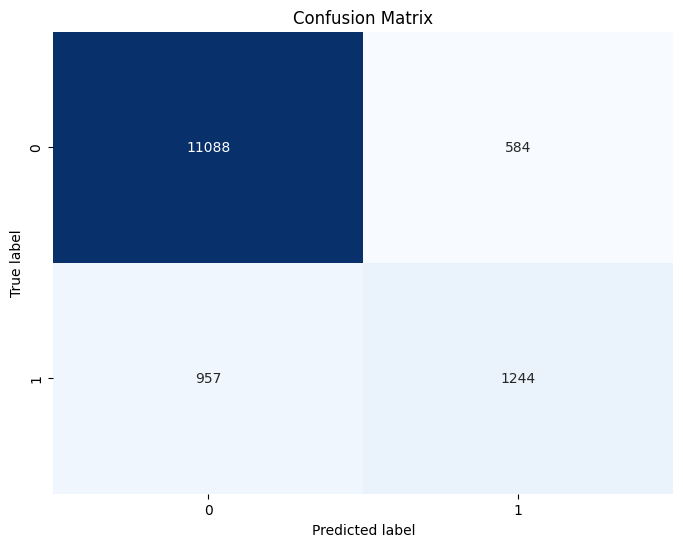

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_acceptance_binary)
print("Accuracy:", accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_acceptance_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


## **Treatment of the Dataset **

In [ ]:
# Before treatment lets calculate the acceptance rates in both control and treatment groups.
Treatment=part3
Control=part2

#Clean the data: Treatment

Treatment.dropna(inplace=True)
is_empty = Treatment.empty

if is_empty:
    print("DataFrame is empty.")
else:
    print("Treatment DataFrame is not empty.")

Treatment['Previous Rate'] = pd.to_numeric(Treatment['Previous Rate'], errors='coerce')
Treatment['Previous Rate'] = Treatment['Previous Rate'].fillna(0)
#df['Car  Type'] = pd.to_numeric(df['Car  Type'], errors='coerce')
Treatment['Car  Type'] = Treatment['Car  Type'].replace(0, 'Unknown')


#Clean Control Data

Control.dropna(inplace=True)
is_empty = Control.empty

if is_empty:
    print("DataFrame is empty.")
else:
    print("Contol DataFrame is not empty.")

Control['Previous Rate'] = pd.to_numeric(Control['Previous Rate'], errors='coerce')
Control['Previous Rate'] = Control['Previous Rate'].fillna(0)
#df['Car  Type'] = pd.to_numeric(df['Car  Type'], errors='coerce')
Control['Car  Type'] = Control['Car  Type'].replace(0, 'Unknown')


Treatment DataFrame is not empty.


KeyError: 'Previous Rate'

In [ ]:
# converting the dates to seasons 1= Summer 2= Fall 3=Winter 4=Spring
import pandas as pd

# Convert the 'Date' column to datetime format
Treatment['Approve Date'] = pd.to_datetime(Treatment['Approve Date'])

# Define a function to map each month to its corresponding season
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:   # Spring: March, April, May
        return 4
    elif month in [6, 7, 8]: # Summer: June, July, August
        return 1
    elif month in [9, 10, 11]: # Fall: September, October, November
        return 2
    else:                    # Winter: December, January, February
        return 3

# et_season function to each date in the 'Date' column
Treatment['Season'] = Treatment['Approve Date'].apply(get_season)

# to differentiate between seasons for each year, you can also add the year to the season

Treatment['Year'] = Treatment['Approve Date'].dt.year
#Treatment['Season_Year'] = Treatment['Year'].astype(str) + '_' + df['Season'].astype(str)

# Drop the 'Year' column if you don't need it anymore
Treatment.drop('Year', axis=1, inplace=True)
#Treatment.drop('Season_Year', axis=1, inplace=True)


print(Treatment)

        Tier   FICO Approve Date  Term   Amount  Previous Rate Car  Type  \
138726   1.0  799.0   2004-02-02  48.0  23000.0           0.00         N   
138727   3.0  678.0   2004-02-02  72.0  23502.0           8.84         R   
138728   3.0  683.0   2004-02-02  60.0  19500.0           8.00         R   
138729   1.0  777.0   2004-02-02  36.0   7300.0           4.95         R   
138730   4.0  661.0   2004-02-02  60.0   9000.0           0.00         U   
...      ...    ...          ...   ...      ...            ...       ...   
208072   1.0  777.0   2004-11-16  48.0  35000.0           0.00         N   
208073   1.0  790.0   2004-11-16  60.0  25000.0           0.00         N   
208074   4.0  663.0   2004-11-16  60.0  31800.0           0.00         N   
208075   1.0  742.0   2004-11-16  60.0  33000.0           0.00         N   
208078   3.0  685.0   2004-11-16  60.0  20022.0           8.00         R   

        Competition rate  Accept?   Rate  Cost of Funds  Partner Bin  Season  
138726  

In [ ]:
#Renaming Columuns

#treatment
Treatment.rename(columns={
    'Previous Rate': 'PreviousRate',
    'Car  Type': 'CarType',
    'Competition rate': 'CompetitionRate',
    'Cost of Funds': 'CostOfFunds',
    'Partner Bin': 'PartnerBin',
    'Accept?': 'Accept'
}, inplace=True)

#Control
Control.rename(columns={
    'Previous Rate': 'PreviousRate',
    'Car  Type': 'CarType',
    'Competition rate': 'CompetitionRate',
    'Cost of Funds': 'CostOfFunds',
    'Partner Bin': 'PartnerBin',
    'Accept?': 'Accept'
}, inplace=True)
Treatment.columns
#Control.columns

Index(['Tier', 'FICO', 'Approve Date', 'Term', 'Amount', 'PreviousRate',
       'CarType', 'CompetitionRate', 'Accept', 'Rate', 'CostOfFunds',
       'PartnerBin', 'Season', 'TierSubclass'],
      dtype='object')

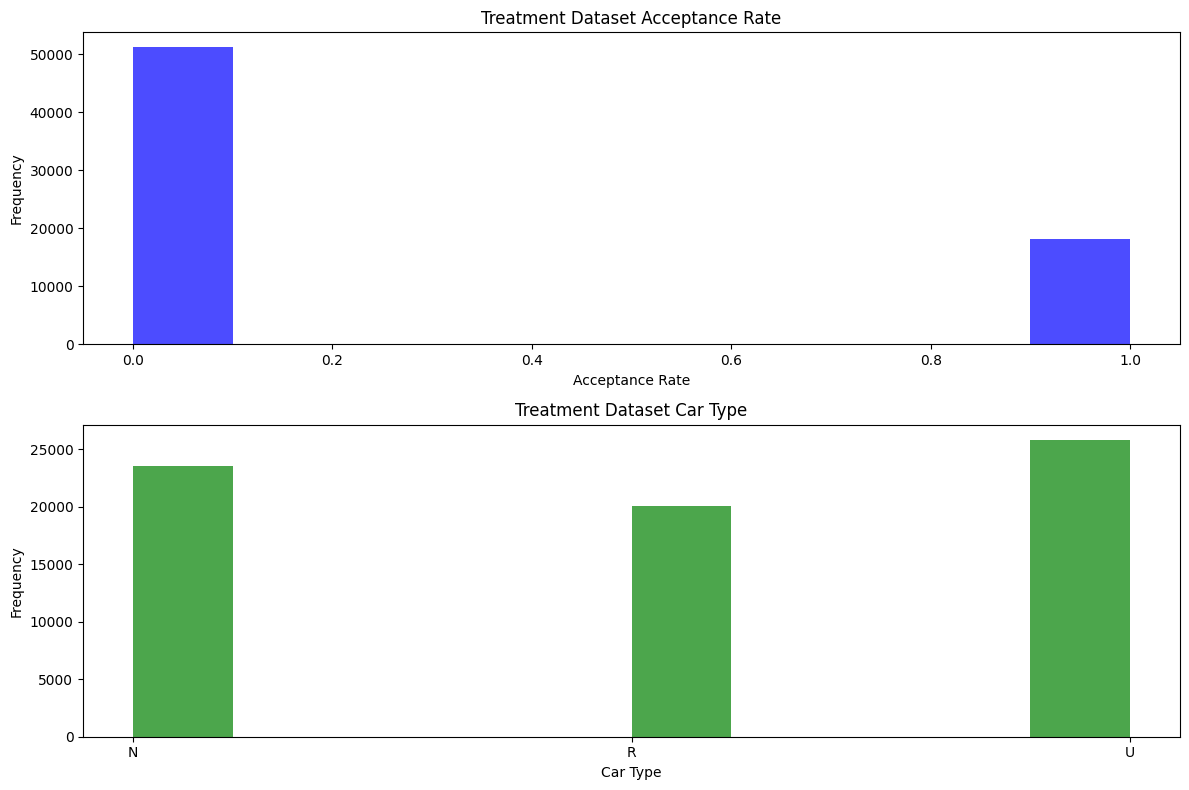

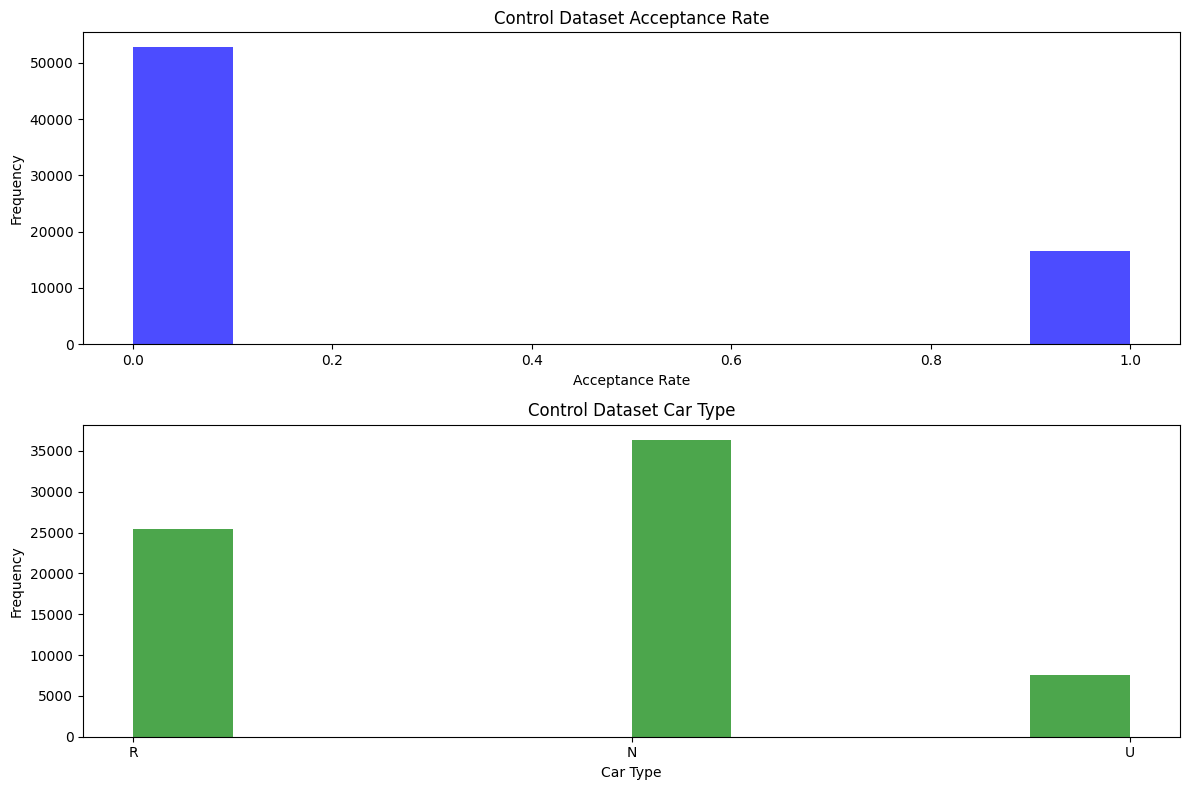

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Plot histograms of the acceptance rate and car type for the treatment dataset
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Histogram of acceptance rate for treatment dataset
axs[0].hist(Treatment['Accept'], bins=10, color='blue', alpha=0.7)
axs[0].set_title('Treatment Dataset Acceptance Rate')
axs[0].set_xlabel('Acceptance Rate')
axs[0].set_ylabel('Frequency')

# Histogram of car type for treatment dataset
axs[1].hist(Treatment['CarType'], bins=10, color='green', alpha=0.7)
axs[1].set_title('Treatment Dataset Car Type')
axs[1].set_xlabel('Car Type')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot histograms of the acceptance rate and car type for the control dataset
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Histogram of acceptance rate for control dataset
axs[0].hist(Control['Accept'], bins=10, color='blue', alpha=0.7)
axs[0].set_title('Control Dataset Acceptance Rate')
axs[0].set_xlabel('Acceptance Rate')
axs[0].set_ylabel('Frequency')

# Histogram of car type for control dataset
axs[1].hist(Control['CarType'], bins=10, color='green', alpha=0.7)
axs[1].set_title('Control Dataset Car Type')
axs[1].set_xlabel('Car Type')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
#Acceptance rate for both groups
# Calculate acceptance percentage for treatment group
acceptance_percentage_treatment = (Treatment['Accept'].sum() / len(Treatment)) * 100

# Calculate acceptance percentage for control group
acceptance_percentage_control = (Control['Accept'].sum() / len(Control)) * 100

print("Acceptance Percentage for Treatment Group:", acceptance_percentage_treatment, "%")
print("Acceptance Percentage for Control Group:", acceptance_percentage_control, "%")


Acceptance Percentage for Treatment Group: 26.107770616141078 %
Acceptance Percentage for Control Group: 23.88881680434814 %


# **a) segmenting the tiers further (Treatment group).**

We are segmenting the 4 tiers using median as breaking point. We will generate 8 tiers (subtiers) to further segment the tiers.

In [ ]:
import pandas as pd

# Calculate median FICO score for each tier
median_fico_per_tier = Treatment.groupby('Tier')['FICO'].median()

# Define a function to assign subclass based on median FICO score
def assign_tier_subclass(row):
    tier = row['Tier']
    fico = row['FICO']
    median_fico = median_fico_per_tier[tier]
    if fico >= median_fico:
        return tier * 2 - 1  # Higher FICO subclass
    else:
        return tier * 2  # Lower FICO subclass

# Apply the function to create the TierSubclass column
Treatment['TierSubclass'] = Treatment.apply(assign_tier_subclass, axis=1)

# Display the DataFrame with TierSubclass
print(Treatment)

# Save Treatment  as separate CSV files
Treatment.to_csv('Treatment.csv', index=False)



        Tier   FICO Approve Date  Term   Amount  PreviousRate CarType  \
138726   1.0  799.0   2004-02-02  48.0  23000.0          0.00       N   
138727   3.0  678.0   2004-02-02  72.0  23502.0          8.84       R   
138728   3.0  683.0   2004-02-02  60.0  19500.0          8.00       R   
138729   1.0  777.0   2004-02-02  36.0   7300.0          4.95       R   
138730   4.0  661.0   2004-02-02  60.0   9000.0          0.00       U   
...      ...    ...          ...   ...      ...           ...     ...   
208072   1.0  777.0   2004-11-16  48.0  35000.0          0.00       N   
208073   1.0  790.0   2004-11-16  60.0  25000.0          0.00       N   
208074   4.0  663.0   2004-11-16  60.0  31800.0          0.00       N   
208075   1.0  742.0   2004-11-16  60.0  33000.0          0.00       N   
208078   3.0  685.0   2004-11-16  60.0  20022.0          8.00       R   

        CompetitionRate  Accept   Rate  CostOfFunds  PartnerBin  Season  \
138726             4.29     0.0   4.29        1.

In [ ]:
#Instances per each tier
# Get the number of instances per each tier
instances_per_tier = Treatment['Tier'].value_counts()

# Display the number of instances per each tier
print(instances_per_tier)


1.0    29824
2.0    15422
3.0    15402
4.0     8703
Name: Tier, dtype: int64


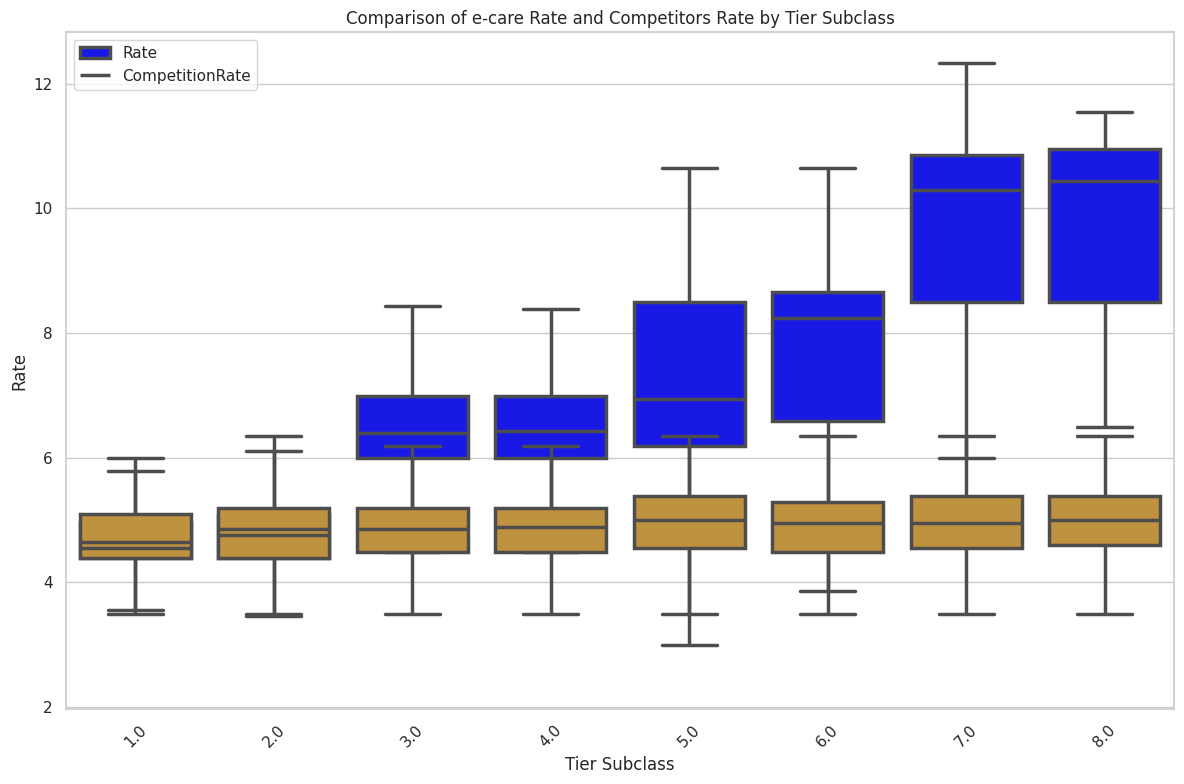

In [ ]:
#To compare the the loan offered by e-car and competitors lets graph it among the tiers in the treatment group.
# Set the style of the plot
sns.set(style="whitegrid")

# Create a box plot of Rate and CompetitionRate grouped by TierSubclass
plt.figure(figsize=(12, 8))

# Plot Rate box plot with transparency and custom color
sns.boxplot(x='TierSubclass', y='Rate', data=Treatment, color='blue', saturation=0.8, linewidth=2.5, fliersize=0)

# Plot CompetitionRate box plot with transparency and custom color
sns.boxplot(x='TierSubclass', y='CompetitionRate', data=Treatment, color='orange', saturation=0.5, linewidth=2.5, fliersize=0)

# Add legend with custom labels and colors
plt.legend(labels=['Rate', 'CompetitionRate'], loc='upper left')

# Add title and labels
plt.title('Comparison of e-care Rate and Competitors Rate by Tier Subclass')
plt.xlabel('Tier Subclass')
plt.ylabel('Rate')

# Adjust plot layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Trial1=Treatment

# Replace Tier with TierSubclass
Trial1.drop(columns=['Tier'], inplace=True)
Trial1.rename(columns={'TierSubclass': 'Tier'}, inplace=True)

# Display the modified treatment dataset
print(Trial1)




         FICO Approve Date  Term   Amount  PreviousRate CarType  \
138726  799.0   2004-02-02  48.0  23000.0          0.00       N   
138727  678.0   2004-02-02  72.0  23502.0          8.84       R   
138728  683.0   2004-02-02  60.0  19500.0          8.00       R   
138729  777.0   2004-02-02  36.0   7300.0          4.95       R   
138730  661.0   2004-02-02  60.0   9000.0          0.00       U   
...       ...          ...   ...      ...           ...     ...   
208072  777.0   2004-11-16  48.0  35000.0          0.00       N   
208073  790.0   2004-11-16  60.0  25000.0          0.00       N   
208074  663.0   2004-11-16  60.0  31800.0          0.00       N   
208075  742.0   2004-11-16  60.0  33000.0          0.00       N   
208078  685.0   2004-11-16  60.0  20022.0          8.00       R   

        CompetitionRate  Accept   Rate  CostOfFunds  PartnerBin  Season  Tier  
138726             4.29     0.0   4.29        1.100         3.0       3   1.0  
138727             5.99     0.0   7

In [ ]:
# Calculate the average interest rate for each tier for e-car
average_interest_rate_by_tier = {}

# Iterate over each tier
for tier in range(1, 9):
    # Filter the dataset for the current tier
    tier_data = Trial1[Trial1['Tier'] == tier]

    # Calculate the average interest rate for this tier
    average_interest_rate = tier_data['Rate'].mean()

    # Update the average interest rate for this tier
    average_interest_rate_by_tier[tier] = average_interest_rate

# Print the average interest rate for each tier
for tier, avg_interest_rate in average_interest_rate_by_tier.items():
    print(f"Tier {tier}: Average Interest Rate = {avg_interest_rate}")


Tier 1: Average Interest Rate = 4.596348318348318
Tier 2: Average Interest Rate = 4.772493078533325
Tier 3: Average Interest Rate = 6.4710870691889095
Tier 4: Average Interest Rate = 6.498119158878504
Tier 5: Average Interest Rate = 7.198894540942929
Tier 6: Average Interest Rate = 7.761785616998093
Tier 7: Average Interest Rate = 9.659584158415841
Tier 8: Average Interest Rate = 9.732621452621453


In [ ]:
# Calculate the average competition rate for each tier for compitators rate
average_competition_rate_by_tier = {}

# Iterate over each tier
for tier in range(1, 9):
    # Filter the dataset for the current tier
    tier_data = Trial1[Trial1['Tier'] == tier]

    # Calculate the average competition rate for this tier
    average_competition_rate = tier_data['CompetitionRate'].mean()

    # Update the average competition rate for this tier
    average_competition_rate_by_tier[tier] = average_competition_rate

# Print the average competition rate for each tier
for tier, avg_competition_rate in average_competition_rate_by_tier.items():
    print(f"Tier {tier}: Average Competition Rate = {avg_competition_rate}")


Tier 1: Average Competition Rate = 4.679724941724942
Tier 2: Average Competition Rate = 4.83757512323587
Tier 3: Average Competition Rate = 4.871982378854625
Tier 4: Average Competition Rate = 4.886142263759086
Tier 5: Average Competition Rate = 4.997290322580645
Tier 6: Average Competition Rate = 4.9274203214383
Tier 7: Average Competition Rate = 4.9612299229923
Tier 8: Average Competition Rate = 4.994112554112554


a) Senario 1- Matching Competitor's (market's rate)

In [ ]:
# Update the Rate column for tiers 3 to 8
for tier in range(3, 9):
    # Filter the dataset for the current tier
    tier_data = Trial1[Trial1['Tier'] == tier]

    # Update the Rate column to be lower than the competition rate for each data point
    Trial1.loc[Trial1['Tier'] == tier, 'Rate'] = tier_data['CompetitionRate']

# Display the updated dataset
print(Trial1)


In [ ]:
# Calculate the average interest rate for each tier
average_interest_rate_by_tier = {}

# Iterate over each tier
for tier in range(1, 9):
    # Filter the dataset for the current tier
    tier_data = Trial1[Trial1['Tier'] == tier]

    # Calculate the average interest rate for this tier
    average_interest_rate = tier_data['Rate'].mean()

    # Update the average interest rate for this tier
    average_interest_rate_by_tier[tier] = average_interest_rate

# Print the average interest rate for each tier
for tier, avg_interest_rate in average_interest_rate_by_tier.items():
    print(f"Tier {tier}: Average Interest Rate = {avg_interest_rate}")

Tier 1: Average Interest Rate = 4.596348318348318
Tier 2: Average Interest Rate = 4.772493078533325
Tier 3: Average Interest Rate = 4.871982378854625
Tier 4: Average Interest Rate = 4.886142263759086
Tier 5: Average Interest Rate = 4.997290322580645
Tier 6: Average Interest Rate = 4.9274203214383
Tier 7: Average Interest Rate = 4.9612299229923
Tier 8: Average Interest Rate = 4.994112554112554


In [ ]:
 # Calculate predicted acceptance rate using the provided coefficients
  # Define the coefficients
intercept_coefficient = 0.155617
coefficient_tier = 0.283590
coefficient_CarType_R = 0.385732
coefficient_CarType_U = 0.534842
coefficient_Amount = -0.000007
coefficient_CompetitionRate = 0.320607
coefficient_Rate = -0.379130

# Calculate predicted acceptance
predicted_acceptance = (
    intercept_coefficient +
    coefficient_tier * Trial1['Tier'] +
    coefficient_CarType_R * (Trial1['CarType'] == 'R').astype(int) +
    coefficient_CarType_U * (Trial1['CarType'] == 'U').astype(int) +
    coefficient_Amount * Trial1['Amount'] +
    coefficient_CompetitionRate * Trial1['CompetitionRate'] +
    coefficient_Rate * Trial1['Rate']
)


# Store the predicted acceptance as 'predicted_acceptance_1' in the dataset
Trial1['predicted_acceptance_1'] = predicted_acceptance
# Convert predicted acceptance to binary values
Trial1['predicted_acceptance_1'] = np.where(predicted_acceptance >= 0.5, 1, 0)

# Display the updated dataset
print(Trial1)




         FICO Approve Date  Term   Amount  PreviousRate CarType  \
138726  799.0   2004-02-02  48.0  23000.0          0.00       N   
138727  678.0   2004-02-02  72.0  23502.0          8.84       R   
138728  683.0   2004-02-02  60.0  19500.0          8.00       R   
138729  777.0   2004-02-02  36.0   7300.0          4.95       R   
138730  661.0   2004-02-02  60.0   9000.0          0.00       U   
...       ...          ...   ...      ...           ...     ...   
208072  777.0   2004-11-16  48.0  35000.0          0.00       N   
208073  790.0   2004-11-16  60.0  25000.0          0.00       N   
208074  663.0   2004-11-16  60.0  31800.0          0.00       N   
208075  742.0   2004-11-16  60.0  33000.0          0.00       N   
208078  685.0   2004-11-16  60.0  20022.0          8.00       R   

        CompetitionRate  Accept  Rate  CostOfFunds  PartnerBin  Season  Tier  \
138726             4.29     0.0  4.29        1.100         3.0       3   1.0   
138727             5.99     0.0  5.

In [ ]:
# Calculate the percentage of predicted acceptance rate
acceptance_percentage = (Trial1['predicted_acceptance_1'].sum() / len(Trial1)) * 100

# Display the percentage
print("Percentage of predicted acceptance rate:", acceptance_percentage, "%")


Percentage of predicted acceptance rate: 76.54828337010281 %


Matching the compittors rate from tier 3-8 elicited 76.5% acceptance rate. We didn't change rate 1-2 because it's very similar.

Scenarion-2: varying the interest rate slightly from the market (equal or grater)
We matched new cars to competitor's rate because less of these loans are accepted. We set the other types of cars at [Competitor rate + 2]

In [ ]:
for tier in range(3, 8):
    # Filter the dataset for the current tier
    tier_data = Trial1[Trial1['Tier'] == tier].copy()  # Make a copy to avoid SettingWithCopyWarning

    # Subtract -1 from Rate if CarType is 'N', otherwise subtract -0.5
    tier_data['Rate'] = tier_data.apply(lambda row: row['CompetitionRate']  if row['CarType'] == 'N' else row['CompetitionRate'] + 2, axis=1)

    # Update the Rate column in the main dataframe using .loc
    Trial1.loc[Trial1['Tier'] == tier, 'Rate'] = tier_data['Rate']

# Display the updated dataset
print(Trial1)


         FICO Approve Date  Term   Amount  PreviousRate CarType  \
138726  799.0   2004-02-02  48.0  23000.0          0.00       N   
138727  678.0   2004-02-02  72.0  23502.0          8.84       R   
138728  683.0   2004-02-02  60.0  19500.0          8.00       R   
138729  777.0   2004-02-02  36.0   7300.0          4.95       R   
138730  661.0   2004-02-02  60.0   9000.0          0.00       U   
...       ...          ...   ...      ...           ...     ...   
208072  777.0   2004-11-16  48.0  35000.0          0.00       N   
208073  790.0   2004-11-16  60.0  25000.0          0.00       N   
208074  663.0   2004-11-16  60.0  31800.0          0.00       N   
208075  742.0   2004-11-16  60.0  33000.0          0.00       N   
208078  685.0   2004-11-16  60.0  20022.0          8.00       R   

        CompetitionRate  Accept  Rate  CostOfFunds  PartnerBin  Season  Tier  \
138726             4.29     0.0  4.29        1.100         3.0       3   1.0   
138727             5.99     0.0  7.

In [ ]:
#Lets recalculate the predicted acceptance now
 # Calculate predicted acceptance rate using the provided coefficients
 # Calculate predicted acceptance rate using the provided coefficients
  # Define the coefficients
intercept_coefficient = 0.155617
coefficient_tier = 0.283590
coefficient_CarType_R = 0.385732
coefficient_CarType_U = 0.534842
coefficient_Amount = -0.000007
coefficient_CompetitionRate = 0.320607
coefficient_Rate = -0.379130

# Calculate predicted acceptance
predicted_acceptance = (
    intercept_coefficient +
    coefficient_tier * Trial1['Tier'] +
    coefficient_CarType_R * (Trial1['CarType'] == 'R').astype(int) +
    coefficient_CarType_U * (Trial1['CarType'] == 'U').astype(int) +
    coefficient_Amount * Trial1['Amount'] +
    coefficient_CompetitionRate * Trial1['CompetitionRate'] +
    coefficient_Rate * Trial1['Rate']
)


# Store the predicted acceptance as 'predicted_acceptance_1' in the dataset
Trial1['predicted_acceptance_2'] = predicted_acceptance
# Convert predicted acceptance to binary values
Trial1['predicted_acceptance_2'] = np.where(predicted_acceptance >= 0.5, 1, 0)

# Display the updated dataset
print(Trial1)

         FICO Approve Date  Term   Amount  PreviousRate CarType  \
138726  799.0   2004-02-02  48.0  23000.0          0.00       N   
138727  678.0   2004-02-02  72.0  23502.0          8.84       R   
138728  683.0   2004-02-02  60.0  19500.0          8.00       R   
138729  777.0   2004-02-02  36.0   7300.0          4.95       R   
138730  661.0   2004-02-02  60.0   9000.0          0.00       U   
...       ...          ...   ...      ...           ...     ...   
208072  777.0   2004-11-16  48.0  35000.0          0.00       N   
208073  790.0   2004-11-16  60.0  25000.0          0.00       N   
208074  663.0   2004-11-16  60.0  31800.0          0.00       N   
208075  742.0   2004-11-16  60.0  33000.0          0.00       N   
208078  685.0   2004-11-16  60.0  20022.0          8.00       R   

        CompetitionRate  Accept  Rate  CostOfFunds  PartnerBin  Season  Tier  \
138726             4.29     0.0  4.29        1.100         3.0       3   1.0   
138727             5.99     0.0  7.

In [ ]:
#lets see if the acceptance rate has improved
# Calculate the percentage of predicted acceptance rate
acceptance_percentage_2 = (Trial1['predicted_acceptance_2'].sum() / len(Trial1)) * 100

# Display the percentage
print("Percentage of predicted acceptance rate:", acceptance_percentage_2, "%")

Percentage of predicted acceptance rate: 66.54121786275613 %


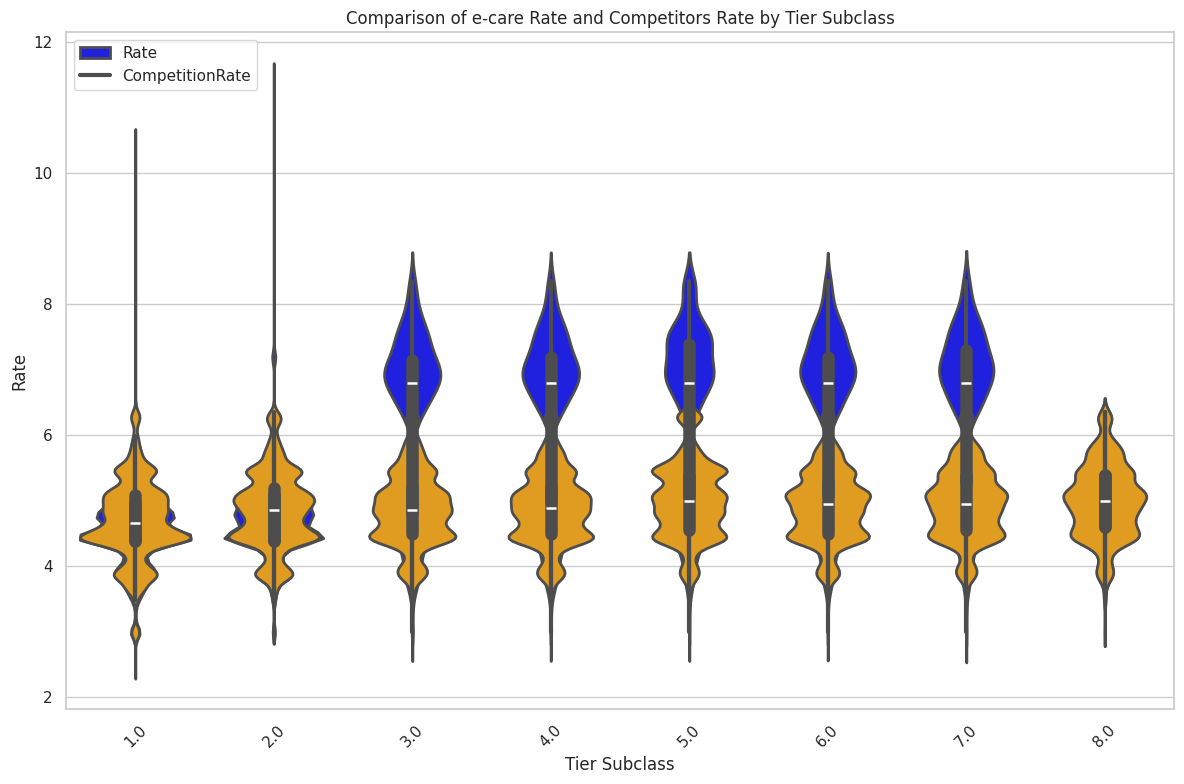

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set(style="whitegrid")

# Create a violin plot of Rate and CompetitionRate grouped by TierSubclass
plt.figure(figsize=(12, 8))

# Plot Rate violin plot with transparency and custom color
sns.violinplot(x='Tier', y='Rate', data=Treatment, color='blue', linewidth=2)

# Plot CompetitionRate violin plot with transparency and custom color
sns.violinplot(x='Tier', y='CompetitionRate', data=Treatment, color='orange', linewidth=2)

# Add legend with custom labels and colors
plt.legend(labels=['Rate', 'CompetitionRate'], loc='upper left')

# Add title and labels
plt.title('Comparison of e-care Rate and Competitors Rate by Tier Subclass')
plt.xlabel('Tier Subclass')
plt.ylabel('Rate')

# Adjust plot layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


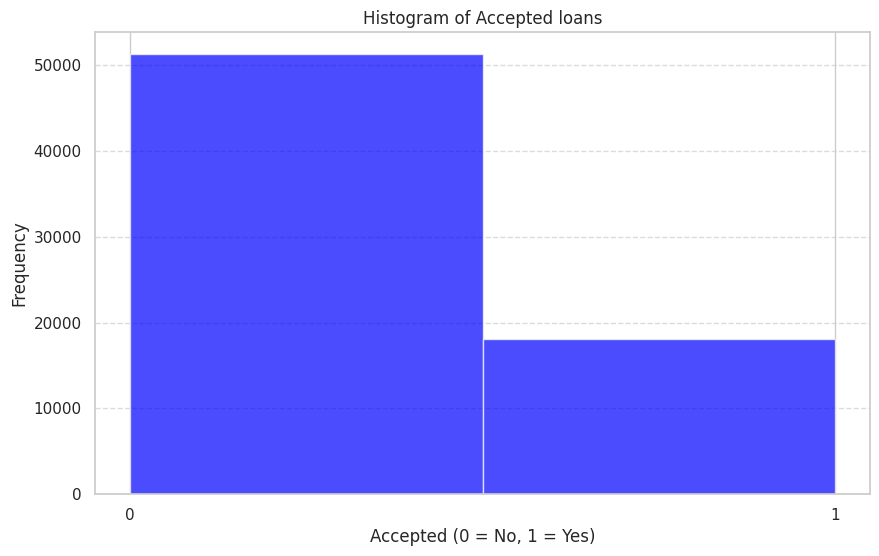

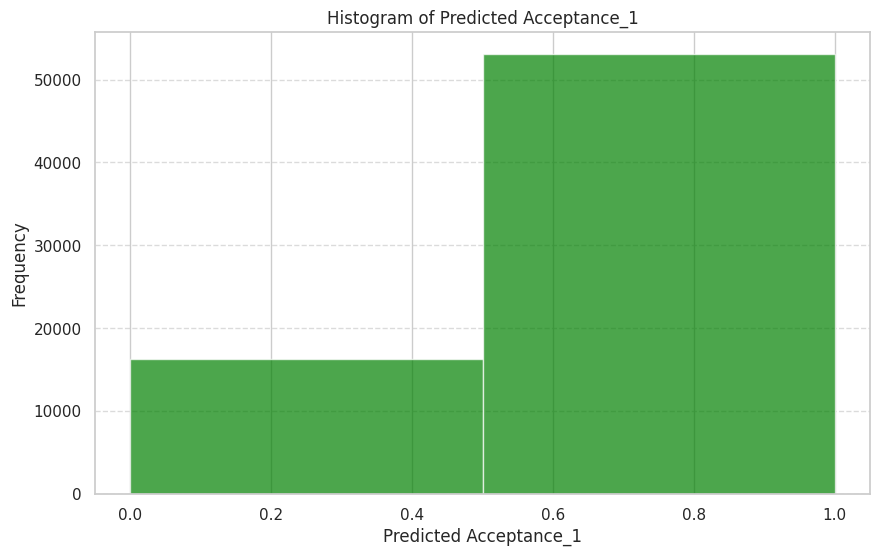

In [ ]:

import matplotlib.pyplot as plt

# Plot histogram for Accepted loans
plt.figure(figsize=(10, 6))
plt.hist(Trial1['Accept'], bins=2, color='blue', alpha=0.7)
plt.title('Histogram of Accepted loans')
plt.xlabel('Accepted (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot histogram for Predicted Acceptance_1
plt.figure(figsize=(10, 6))
plt.hist(Trial1['predicted_acceptance_1'], bins=2, color='green', alpha=0.7)
plt.title('Histogram of Predicted Acceptance_1')
plt.xlabel('Predicted Acceptance_1')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# **B) Optimizing Pricing Variables in a Single Segment (Segment 4)

In [ ]:
#In the exploratory Data we observed that long term was more favored by customers. This would work for e-car since interest rate is proposed to go down compared to the tradional pricing method they had.
#Now we will explore the term , cost of fund and profit.

#term we have decided to normilize all loans from 45-70 months median will peak at 60 months which was the prefered term.
#lets normilize the  loan term now 45-70 since more loans in that range were accepted

# Define the original minimum and maximum values of the 'Term' column
original_min_term = Trial1['Term'].min()
original_max_term = Trial1['Term'].max()

# Define the new minimum and maximum values for normalization
new_min_term = 45
new_max_term = 70

# Perform min-max normalization on the 'Term' column
Trial1['Term'] = ((Trial1['Term'] - original_min_term) / (original_max_term - original_min_term)) * (new_max_term - new_min_term) + new_min_term

# Display the updated dataset
print(Trial1)


         FICO Approve Date       Term   Amount  PreviousRate CarType  \
138726  799.0   2004-02-02  53.333333  23000.0          0.00       N   
138727  678.0   2004-02-02  70.000000  23502.0          8.84       R   
138728  683.0   2004-02-02  61.666667  19500.0          8.00       R   
138729  777.0   2004-02-02  45.000000   7300.0          4.95       R   
138730  661.0   2004-02-02  61.666667   9000.0          0.00       U   
...       ...          ...        ...      ...           ...     ...   
208072  777.0   2004-11-16  53.333333  35000.0          0.00       N   
208073  790.0   2004-11-16  61.666667  25000.0          0.00       N   
208074  663.0   2004-11-16  61.666667  31800.0          0.00       N   
208075  742.0   2004-11-16  61.666667  33000.0          0.00       N   
208078  685.0   2004-11-16  61.666667  20022.0          8.00       R   

        CompetitionRate  Accept  Rate  CostOfFunds  PartnerBin  Season  Tier  \
138726             4.29     0.0  4.29        1.100     

Choosing one segment to optimize price per instruction

In [ ]:
# Extract segment 4 data
segment4 = Trial1[Trial1['Tier'] == 4]

# Extract segment 6 data
segment6 = Trial1[Trial1['Tier'] == 6]

# Save segment 4 and segment 6 datasets as separate CSV files
segment4.to_csv('segment_4.csv', index=False)
segment6.to_csv('segment_6.csv', index=False)


In [ ]:
#Segment 4# Drop predicted_acceptance_1 and predicted_acceptance_2 columns from segment_4
segment4 = segment4.drop(['predicted_acceptance_1', 'predicted_acceptance_2'], axis=1)

# Calculate predicted acceptance rate using the provided coefficients
# Define the coefficients
# Segment 4
# Drop predicted_acceptance_1 and predicted_acceptance_2 columns from segment_4
# segment_4 = segment_4.drop(['predicted_acceptance_1', 'predicted_acceptance_2'], axis=1)

# Calculate predicted acceptance rate using the provided coefficients
# Define the coefficients
intercept_coefficient = 0.155617
coefficient_tier = 0.283590
coefficient_CarType_R = 0.385732
coefficient_CarType_U = 0.534842
coefficient_Amount = -0.000007
coefficient_CompetitionRate = 0.320607
coefficient_Rate = -0.379130

# Calculate predicted acceptance
predicted_acceptance = (
    intercept_coefficient +
    coefficient_tier * segment4['Tier'] +
    coefficient_CarType_R * (segment4['CarType'] == 'R').astype(int) +
    coefficient_CarType_U * (segment4['CarType'] == 'U').astype(int) +
    coefficient_Amount * segment4['Amount'] +
    coefficient_CompetitionRate * segment4['CompetitionRate'] +
    coefficient_Rate * segment4['Rate']
)

# Store the predicted acceptance as 'predicted_acceptance' in the dataset
segment4['predicted_acceptance'] = predicted_acceptance


PD = 1 - predicted_acceptance
segment4['PD'] = PD
# Display the updated dataset
print(segment4)


         FICO Approve Date       Term    Amount  PreviousRate CarType  \
138761  711.0   2004-02-02  61.666667  26500.00          7.50       R   
138764  709.0   2004-02-02  53.333333  11591.98          0.00       N   
138767  700.0   2004-02-02  61.666667  20000.00          6.25       R   
138768  682.0   2004-02-02  45.000000  11450.00          9.25       R   
138773  696.0   2004-02-02  70.000000  51000.00          0.00       N   
...       ...          ...        ...       ...           ...     ...   
208017  704.0   2004-11-16  61.666667  24999.99          0.00       N   
208038  710.0   2004-11-16  61.666667  19800.00          7.50       R   
208040  706.0   2004-11-16  61.666667  41999.99          0.00       N   
208053  707.0   2004-11-16  61.666667  34999.99          0.00       N   
208056  702.0   2004-11-16  70.000000  12944.32          6.40       R   

        CompetitionRate  Accept  Rate  CostOfFunds  PartnerBin  Season  Tier  \
138761             5.19     1.0  7.19      

In [ ]:
#store the predicted acceptance as binary in the dataset
segment4['predicted_acceptance'] = np.where(predicted_acceptance >= 0.5, 1, 0)
segment4

,FICO,Approve Date,Term,Amount,PreviousRate,CarType,CompetitionRate,Accept,Rate,CostOfFunds,PartnerBin,Season,Tier,predicted_acceptance,PD
138761,711.0,2004-02-02,61.666667,26500.00,7.50,R,5.19,1.0,7.19,1.100,1.0,3,4.0,0,0.571785
138764,709.0,2004-02-02,53.333333,11591.98,0.00,N,4.29,1.0,4.29,1.100,3.0,3,4.0,1,0.042231
138767,700.0,2004-02-02,61.666667,20000.00,6.25,R,5.19,1.0,7.19,1.100,2.0,3,4.0,0,0.526285
138768,682.0,2004-02-02,45.000000,11450.00,9.25,R,4.75,0.0,6.75,1.100,3.0,3,4.0,1,0.440685
138773,696.0,2004-02-02,70.000000,51000.00,0.00,N,4.99,0.0,4.99,1.100,2.0,3,4.0,1,0.359053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208017,704.0,2004-11-16,61.666667,24999.99,0.00,N,4.45,0.0,4.45,2.127,3.0,2,4.0,1,0.145450
208038,710.0,2004-11-16,61.666667,19800.00,7.50,R,5.55,1.0,7.55,2.127,3.0,2,4.0,0,0.545954
208040,706.0,2004-11-16,61.666667,41999.99,0.00,N,4.45,0.0,4.45,2.127,3.0,2,4.0,1,0.264450
208053,707.0,2004-11-16,61.666667,34999.99,0.00,N,4.45,0.0,4.45,2.127,3.0,2,4.0,1,0.215450


To calculate the profit, interest earned, total cost, and expected loss, We will use the following formulas:

Interest Earned: This represents the total interest earned on the loans granted by the lender.
Interest Earned
=
Rate
×
Amount
×
Term
Interest Earned=Rate×Amount×Term

Total Cost: This includes all costs associated with funding the loans, such as the cost of funds.
Total Cost
=
Cost of Funds
×
Amount
Total Cost=Cost of Funds×Amount

Expected Loss: This is the expected amount of loss due to defaults on the loans, based on the probability of default (PD).
Expected Loss
=
PD
×
Amount
Expected Loss=PD×Amount/(term/12) * We are assumig customers default half way

Profit: This is the difference between the interest earned and the total cost, adjusted for the expected loss.
Profit
=
Interest Earned
−
Total Cost
−
Expected Loss
Profit=Interest Earned−Total Cost−Expected Loss


In [ ]:
# Calculate Interest Earned
segment4['Interestearned'] = (segment4['Rate']/100) * segment4['Amount'] * (segment4['Term']/12)

# Calculate Total Cost
segment4['TotalCost'] = (segment4['CostOfFunds']/100) * segment4['Amount']

# Calculate Expected Loss (here we are assuming they default in year 2)
segment4['ExpectedLoss'] = (segment4['PD']*segment4['Amount'] )/ (segment4['Term']/24)

# Calculate Profit
segment4['Profit'] = (segment4['Interestearned'] - segment4['TotalCost'] ) *segment4['predicted_acceptance']
segment4# Calculate Final Profit Projection
final_profit_projection = segment4['Profit'].sum()
final_profit_projection_WithpossibleDefault= (segment4['Profit'].sum()-segment4['ExpectedLoss'].sum())

# Display the final profit projection
print("Final Profit Projection without defaults:", final_profit_projection)
print("Final Profit Projection with defaults:", final_profit_projection_WithpossibleDefault)
segment4

Final Profit Projection without defaults: 41133066.287941456
Final Profit Projection with defaults: 12668323.337049324


,FICO,Approve Date,Term,Amount,PreviousRate,CarType,CompetitionRate,Accept,Rate,CostOfFunds,PartnerBin,Season,Tier,predicted_acceptance,PD,Interestearned,TotalCost,ExpectedLoss,Profit
138761,711.0,2004-02-02,61.666667,26500.00,7.50,R,5.19,1.0,7.19,1.100,1.0,3,4.0,0,0.571785,9791.381944,291.500000,5897.116140,0.000000
138764,709.0,2004-02-02,53.333333,11591.98,0.00,N,4.29,1.0,4.29,1.100,3.0,3,4.0,1,0.042231,2210.204187,127.511780,220.290957,2082.692407
138767,700.0,2004-02-02,61.666667,20000.00,6.25,R,5.19,1.0,7.19,1.100,2.0,3,4.0,0,0.526285,7389.722222,220.000000,4096.491529,0.000000
138768,682.0,2004-02-02,45.000000,11450.00,9.25,R,4.75,0.0,6.75,1.100,3.0,3,4.0,1,0.440685,2898.281250,125.950000,2691.117927,2772.331250
138773,696.0,2004-02-02,70.000000,51000.00,0.00,N,4.99,0.0,4.99,1.100,2.0,3,4.0,1,0.359053,14845.250000,561.000000,6278.294150,14284.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208017,704.0,2004-11-16,61.666667,24999.99,0.00,N,4.45,0.0,4.45,2.127,3.0,2,4.0,1,0.145450,5717.011602,531.749787,1415.191347,5185.261815
208038,710.0,2004-11-16,61.666667,19800.00,7.50,R,5.55,1.0,7.55,2.127,3.0,2,4.0,0,0.545954,7682.125000,421.146000,4207.089316,0.000000
208040,706.0,2004-11-16,61.666667,41999.99,0.00,N,4.45,0.0,4.45,2.127,3.0,2,4.0,1,0.264450,9604.581047,893.339787,4322.688953,8711.241259
208053,707.0,2004-11-16,61.666667,34999.99,0.00,N,4.45,0.0,4.45,2.127,3.0,2,4.0,1,0.215450,8003.817158,744.449787,2934.781354,7259.367370


In [ ]:
#Now lets calculate what the initial Profit
Treatment=pd.read_csv('Treatment.csv')
Untreatedsegment4= Treatment[Treatment['TierSubclass'] == 4]

Untreatedsegment4
#Untreatedsegment4 = Untreatedsegment4.drop(['predicted_acceptance_1', 'predicted_acceptance_2'], axis=1)

,Tier,FICO,Approve Date,Term,Amount,PreviousRate,CarType,CompetitionRate,Accept,Rate,CostOfFunds,PartnerBin,Season,TierSubclass
35,2.0,711.0,2004-02-02,60.0,26500.00,7.50,R,5.19,1.0,6.03,1.100,1.0,3,4.0
38,2.0,709.0,2004-02-02,48.0,11591.98,0.00,N,4.29,1.0,5.79,1.100,3.0,3,4.0
41,2.0,700.0,2004-02-02,60.0,20000.00,6.25,R,5.19,1.0,4.99,1.100,2.0,3,4.0
42,2.0,682.0,2004-02-02,36.0,11450.00,9.25,R,4.75,0.0,6.39,1.100,3.0,3,4.0
47,2.0,696.0,2004-02-02,72.0,51000.00,0.00,N,4.99,0.0,5.99,1.100,2.0,3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69291,2.0,704.0,2004-11-16,60.0,24999.99,0.00,N,4.45,0.0,6.39,2.127,3.0,2,4.0
69312,2.0,710.0,2004-11-16,60.0,19800.00,7.50,R,5.55,1.0,6.19,2.127,3.0,2,4.0
69314,2.0,706.0,2004-11-16,60.0,41999.99,0.00,N,4.45,0.0,6.39,2.127,3.0,2,4.0
69327,2.0,707.0,2004-11-16,60.0,34999.99,0.00,N,4.45,0.0,6.39,2.127,3.0,2,4.0


In [ ]:
# Calculate Interest Earned
Untreatedsegment4['Interestearned'] = (Untreatedsegment4['Rate']/100) * Untreatedsegment4['Amount'] * (Untreatedsegment4['Term']/12)

# Calculate Total Cost
Untreatedsegment4['TotalCost'] = (Untreatedsegment4['CostOfFunds']/100) * Untreatedsegment4['Amount']

# Calculate Profit
Untreatedsegment4['Profit'] = (Untreatedsegment4['Interestearned'] - Untreatedsegment4['TotalCost'] ) *Untreatedsegment4['Accept']
# Calculate Final Profit Projection
final_profit_projection = Untreatedsegment4['Profit'].sum()

# Display the final profit projection
print("Final Profit Projection without defaults:", final_profit_projection)

Untreatedsegment4

Final Profit Projection without defaults: 9569976.02788558


<ipython-input-67-c26e05b99080>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Untreatedsegment4['Interestearned'] = (Untreatedsegment4['Rate']/100) * Untreatedsegment4['Amount'] * (Untreatedsegment4['Term']/12)
<ipython-input-67-c26e05b99080>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Untreatedsegment4['TotalCost'] = (Untreatedsegment4['CostOfFunds']/100) * Untreatedsegment4['Amount']
<ipython-input-67-c26e05b99080>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Tier,FICO,Approve Date,Term,Amount,PreviousRate,CarType,CompetitionRate,Accept,Rate,CostOfFunds,PartnerBin,Season,TierSubclass,Interestearned,TotalCost,Profit
35,2.0,711.0,2004-02-02,60.0,26500.00,7.50,R,5.19,1.0,6.03,1.100,1.0,3,4.0,7989.750000,291.500000,7698.250000
38,2.0,709.0,2004-02-02,48.0,11591.98,0.00,N,4.29,1.0,5.79,1.100,3.0,3,4.0,2684.702568,127.511780,2557.190788
41,2.0,700.0,2004-02-02,60.0,20000.00,6.25,R,5.19,1.0,4.99,1.100,2.0,3,4.0,4990.000000,220.000000,4770.000000
42,2.0,682.0,2004-02-02,36.0,11450.00,9.25,R,4.75,0.0,6.39,1.100,3.0,3,4.0,2194.965000,125.950000,0.000000
47,2.0,696.0,2004-02-02,72.0,51000.00,0.00,N,4.99,0.0,5.99,1.100,2.0,3,4.0,18329.400000,561.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69291,2.0,704.0,2004-11-16,60.0,24999.99,0.00,N,4.45,0.0,6.39,2.127,3.0,2,4.0,7987.496805,531.749787,0.000000
69312,2.0,710.0,2004-11-16,60.0,19800.00,7.50,R,5.55,1.0,6.19,2.127,3.0,2,4.0,6128.100000,421.146000,5706.954000
69314,2.0,706.0,2004-11-16,60.0,41999.99,0.00,N,4.45,0.0,6.39,2.127,3.0,2,4.0,13418.996805,893.339787,0.000000
69327,2.0,707.0,2004-11-16,60.0,34999.99,0.00,N,4.45,0.0,6.39,2.127,3.0,2,4.0,11182.496805,744.449787,0.000000
